In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Objective of the Study:

- We intend to understand the demographics that are deeply impacting our sale of Treadmills.
- What we can do to improve our product positioning?

In [2]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749')

df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [3]:
demographic_vars = ['Age', 'Gender', 'Income', 'Education', 'MaritalStatus']

customer_input_vars = ['Usage', 'Fitness', 'Miles']

### Missing Values/Outlier Detection

In [4]:
#checking datatypes
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [5]:
#number of unique values in our data
for i in df.columns:
  print(i,':',df[i].nunique())

Product : 3
Age : 32
Gender : 2
Education : 8
MaritalStatus : 2
Usage : 6
Fitness : 5
Income : 62
Miles : 37


In [6]:
#checking null values in every column of our data
df.isnull().sum()/len(df)*100

Product          0.0
Age              0.0
Gender           0.0
Education        0.0
MaritalStatus    0.0
Usage            0.0
Fitness          0.0
Income           0.0
Miles            0.0
dtype: float64

In [7]:
#checking the occurences of each of the Education
df['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [8]:
#checking the occurences of each of the MaritalStatus
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [9]:
#checking the occurences of each of the Fitness
df['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [12]:
#checking the occurences of each of the Usage
df['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [13]:
#checking the occurences of each of the Gender
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [3]:
for i in df.columns:
    print(i, " - ", df[i].dtypes, ", unique value count- ", df[i].nunique(), ", unique values - ", ", ".join(map(str, df[i].unique())) if df[i].dtypes not in (int, float) else 'float/int', ", null values - ", df[i].isnull().sum())

# There are no missing values in the data

Product  -  object , unique value count-  3 , unique values -  KP281, KP481, KP781 , null values -  0
Age  -  int64 , unique value count-  32 , unique values -  float/int , null values -  0
Gender  -  object , unique value count-  2 , unique values -  Male, Female , null values -  0
Education  -  int64 , unique value count-  8 , unique values -  float/int , null values -  0
MaritalStatus  -  object , unique value count-  2 , unique values -  Single, Partnered , null values -  0
Usage  -  int64 , unique value count-  6 , unique values -  float/int , null values -  0
Fitness  -  int64 , unique value count-  5 , unique values -  float/int , null values -  0
Income  -  int64 , unique value count-  62 , unique values -  float/int , null values -  0
Miles  -  int64 , unique value count-  37 , unique values -  float/int , null values -  0


In [4]:
df.describe(include='object')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [5]:
df.describe().loc[["mean", "50%"], :]

,Age,Education,Usage,Fitness,Income,Miles
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000


In [49]:
num_cols = list(df.describe().columns)

# Since, education and Fitness are not continuous variables
num_cols.remove('Education')
num_cols.remove('Fitness')

In [50]:
num_cols

['Age', 'Usage', 'Income', 'Miles']

In [51]:
df.describe().loc["mean", i] < df.describe().loc["50%", i]

False



Age
mean    28.788889
50%     26.000000
Name: Age, dtype: float64
The column: Age has outliers towards the right


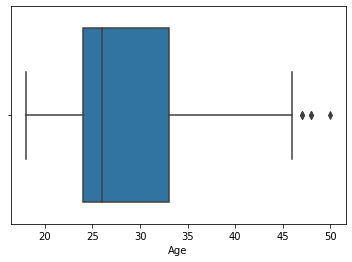



Usage
mean    3.455556
50%     3.000000
Name: Usage, dtype: float64
The column: Usage has outliers towards the right


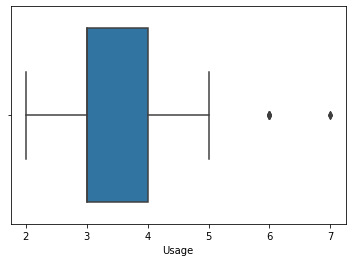



Income
mean    53719.577778
50%     50596.500000
Name: Income, dtype: float64
The column: Income has outliers towards the right


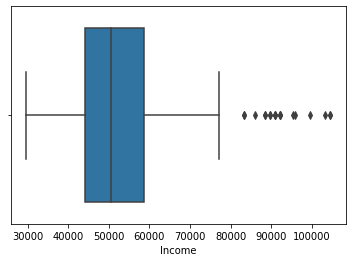



Miles
mean    103.194444
50%      94.000000
Name: Miles, dtype: float64
The column: Miles has outliers towards the right


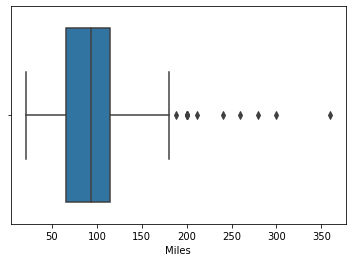

In [53]:
# Outlier Detection in continuous variables

for i in num_cols:

    print("\n")
    print(i)

    print(df.describe().loc[["mean", "50%"], i])
    if df.describe().loc["mean", i] < df.describe().loc["50%", i]:
        # If mean is lesser than median then outliers are towards the left
        print(f"The column: {i} has outliers towards the left")
    elif df.describe().loc["mean", i] > df.describe().loc["50%", i]:
        # If mean is more than median then outliers are towards the right
        print(f"The column: {i} has outliers towards the right")
    else:
        print(f"The column: {i} doesn't have any outliers")

    sns.boxplot(x=df[i])
    plt.show()


In [9]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [54]:
pd.qcut(df['Age'], q=3)

# The age cohorts created via the 3 quantile method makes a lot of business sense
# Hence, we are going to stick to this variable. 

0      (17.999, 25.0]
1      (17.999, 25.0]
2      (17.999, 25.0]
3      (17.999, 25.0]
4      (17.999, 25.0]
            ...      
175    (30.333, 50.0]
176    (30.333, 50.0]
177    (30.333, 50.0]
178    (30.333, 50.0]
179    (30.333, 50.0]
Name: Age, Length: 180, dtype: category
Categories (3, interval[float64, right]): [(17.999, 25.0] < (25.0, 30.333] < (30.333, 50.0]]

In [74]:
df['Age_Cohorts'] = pd.qcut(df['Age'], q=3, labels=['Young', 'Mature', 'Elderly'])

In [75]:
pd.qcut(df['Education'], q=3)

# The Education cohorts created via the 3 quantile method makes a lot of business sense
# Hence, we are going to stick to this variable. 

0      (11.999, 14.0]
1        (14.0, 16.0]
2      (11.999, 14.0]
3      (11.999, 14.0]
4      (11.999, 14.0]
            ...      
175      (16.0, 21.0]
176      (16.0, 21.0]
177      (14.0, 16.0]
178      (16.0, 21.0]
179      (16.0, 21.0]
Name: Education, Length: 180, dtype: category
Categories (3, interval[float64, right]): [(11.999, 14.0] < (14.0, 16.0] < (16.0, 21.0]]

In [76]:
df['Education_Cohorts'] = pd.qcut(df['Education'], q=3, labels=['Primary Ed', 'Secondary Ed', 'Senior Ed'])

## Impact of Marital status, Age have any effect on the product purchased

In [77]:
df['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

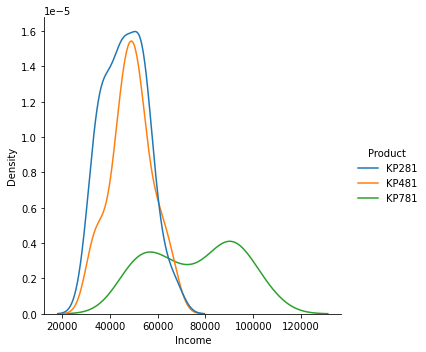

In [81]:
# df['Fitness']==3
data = df.loc[:, :]

sns.displot(x=data['Income'], hue = data['Product'], kind='kde')
plt.show()

# Higher Income as well as Lower income folks are buying KP781.
# KP281, KP481 are bought by Lower Income folks only. (less than 80000 income)

In [ ]:
# From the above graph, we can see that 80000 income seems to be an inflection point.
# Hence, breaking the income dist into two parts.

df['Income_Cohorts'] = pd.cut(df['Income'], bins= [df['Income'].min()-1, 80000, df['Income'].max()], labels=["Low Income", "High Income"])

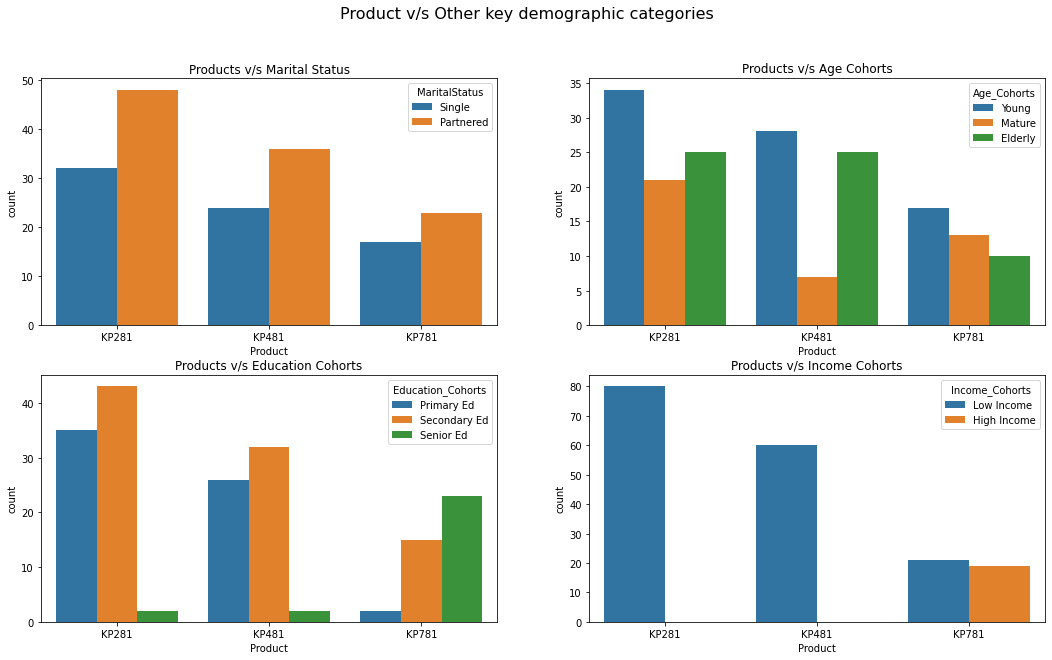

In [100]:
# Marital Status v/s Products Purchased
plt.figure(figsize=(18, 10))

plt.subplot(2, 2, 1)
sns.countplot(x=df['Product'], hue = df['MaritalStatus'])
plt.title("Products v/s Marital Status", fontsize=12)

plt.subplot(2, 2, 2)
sns.countplot(x=df['Product'], hue = df['Age_Cohorts'])
plt.title("Products v/s Age Cohorts", fontsize=12)
# plt.show()
 
plt.subplot(2, 2, 3)
sns.countplot(x=df['Product'], hue = df['Education_Cohorts'])
plt.title("Products v/s Education Cohorts", fontsize=12)
# plt.show()
 
plt.subplot(2, 2, 4)
sns.countplot(x=df['Product'], hue = df['Income_Cohorts'])
plt.title("Products v/s Income Cohorts", fontsize=12)

plt.suptitle("Product v/s Other key demographic categories", fontsize=16)
plt.show()


In [109]:
customer_input_vars

['Usage', 'Fitness', 'Miles']

In [14]:
pd.crosstab(index=df['Product'], columns =df['MaritalStatus'])

MaritalStatus,Partnered,Single
Product,,
KP281,48,32
KP481,36,24
KP781,23,17


In [15]:
pd.crosstab(index=df['Product'], columns =df['Age_Cohorts'])

Cohorts_by_Age,Young,Mature,Elderly
Product,,,
KP281,34,21,25
KP481,28,7,25
KP781,17,13,10


In [101]:
pd.crosstab(index=df['Product'], columns =df['Income_Cohorts'])

Income_Cohorts,Low Income,High Income
Product,,
KP281,80,0
KP481,60,0
KP781,21,19


In [67]:
pd.crosstab(index=df['Product'], columns =df['Education_Cohorts'])

Education_Cohorts,Primary Ed,Secondary Ed,Senior Ed
Product,,,
KP281,35,43,2
KP481,26,32,2
KP781,2,15,23


<Figure size 1152x432 with 0 Axes>

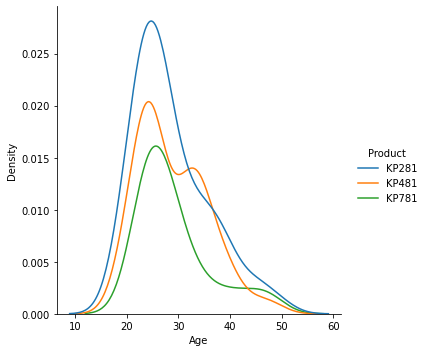

In [16]:
plt.figure(figsize=(16, 6))

sns.displot(x=df['Age'], hue = df['Product'], kind='kde')
plt.show()



<Figure size 1152x432 with 0 Axes>

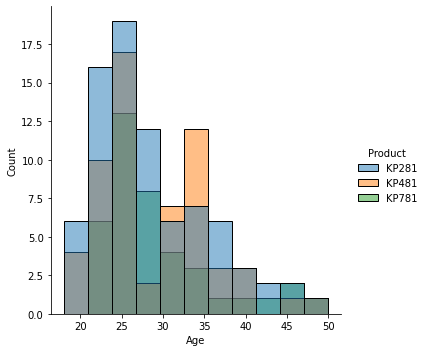

In [17]:
plt.figure(figsize=(16, 6))

sns.displot(x=df['Age'], hue = df['Product'])
plt.show()

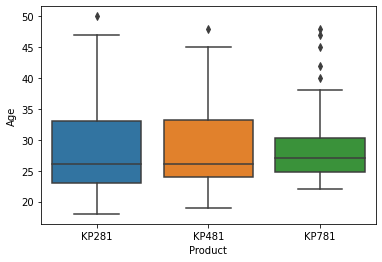

In [18]:
sns.boxplot(y=df['Age'], x = df['Product'])
plt.show()

# Age doesn't effect any product sale here, all age groups buy all products 

#### Result: 
- The products are preferred in **Partnered couples**
- Age wise there doesn't seem to be much difference across Product buying pattern. Since the distributions look quite similar but the **median of KP781** is little bit on the higher age group probably because it is much advanced and expensive than the others.
- It seems that the Young Cohort prefer **KP281** more than Mature and Elderly Audiences
- It seems that the Young & Elderly Cohorts prefer **KP481** more than Mature Audiences whereas sales of **KP781** is somewhat similar across cohorts

## What percent of customers have purchased various products?

In [23]:
def cat_pct(data=df, agg_var='Product', cat='MaritalStatus', ret=False):
    
    if ret:
        # If ret = True then we see analysis across categories i.e. cat variable
        m_cust = pd.crosstab(index=data[agg_var], columns=data[cat]).T
        stri = "---------------------------------------"
        a = m_cust.sum(axis=1)
        
        # Calculating Marginal Probab across Categories i.e. cat
        print(f"Marginal Probab across {cat}=")
        for i in a.index:
            print(f"P({cat} = {i}) = {round(a.loc[i]/data.shape[0], 3)}")   
        print("\n")     

        # Calculating Percentages across Categories i.e. cat
        for i in m_cust.columns:
            m_cust[i]=round(m_cust[i]*100/a, 2)        
        return m_cust
    else:
        # If ret = False then we see analysis across aggregator variable i.e. agg_var variable
        m_cust = pd.crosstab(index=data[agg_var], columns=data[cat])
        stri = "---------------------------------------"

        # Generating cross tab across products w.r.t categories
        print(f"Crosstab for {agg_var} w.r.t {cat} =")
        print(stri)
        print(m_cust)
        print(stri)

        # Calculating Marginal Probab across Categories i.e. cat
        a = m_cust.sum(axis=1)
        print(f"Marginal Probab across {agg_var}=")
        for i in a.index:
            print(f"P({agg_var} = {i}) = {round(a.loc[i]/data.shape[0], 3)}")
        print("\n")

        # Calculating Percentages across Product i.e. agg_var
        for i in m_cust.columns:
            m_cust[i]=round(m_cust[i]*100/a, 2)
        return m_cust

In [58]:
def cat_analysis(agg_var='Product', cat='Age_Cohorts'):
    age_df = cat_pct(data=df, agg_var=agg_var, cat=cat, ret=False)

    # Converting pct number to string pct's
    sup_df = age_df.copy(deep=True)
    for i in sup_df:
        sup_df[i] = sup_df[i].astype(str) + "%"
    
    # Printing Percentages across Product i.e. agg_var
    print(f"Percentage Distribution across {agg_var} w.r.t {cat} = ")
    print(sup_df)
    print("\n")

    # Calculating Conditional Probab of Category i.e. cat given Product is already Sold i.e. agg_var
    for col in age_df.columns:
        for j in age_df.index:
            print(f"P({col} | {agg_var} = {j}) = ")
            print(round(age_df.loc[j, col]/100, 3))
            print("\n")

    age_df = cat_pct(data=df, agg_var=agg_var, cat=cat, ret=True)

    # Converting pct number to string pct's
    sup_df = age_df.copy(deep=True)
    for i in sup_df:
        sup_df[i] = sup_df[i].astype(str) + "%"

    # Printing Percentages across Categories i.e. cat
    print(f"Percentage Distribution across {cat} w.r.t {agg_var} = ")
    print(sup_df)
    print("\n")

    # Calculating Conditional Probab of Product Selling i.e. agg_var given Customer belongs to Category i.e. cat
    for col in age_df.columns:
        for j in age_df.index:
            print(f"P({col} | {cat} = {j}) = ")
            print(round(age_df.loc[j, col]/100, 3))
            print("\n")    

## Categorization of Users

In [25]:
cat_analysis(agg_var='Product', cat='MaritalStatus')

# P(MaritalStatus = Partnered) = 0.594
# Partnered people are significantly buying the three products more than single people 

# P(KP281 | MaritalStatus = Partnered) = 0.449
# P(KP481 | MaritalStatus = Partnered) = 0.336


# P(KP281 | MaritalStatus = Single) = 0.438
# P(KP481 | MaritalStatus = Single) = 0.329

# Both Partnered and Singles prefer KP281 or KP481 over KP781

Crosstab for Product w.r.t MaritalStatus =
---------------------------------------
MaritalStatus  Partnered  Single
Product                         
KP281                 48      32
KP481                 36      24
KP781                 23      17
---------------------------------------
Marginal Probab across Product=
P(Product = KP281) = 0.444
P(Product = KP481) = 0.333
P(Product = KP781) = 0.222


Percentage Distribution across Product w.r.t MaritalStatus = 
MaritalStatus Partnered Single
Product                       
KP281             60.0%  40.0%
KP481             60.0%  40.0%
KP781             57.5%  42.5%


P(Partnered | Product = KP281) = 
0.6


P(Partnered | Product = KP481) = 
0.6


P(Partnered | Product = KP781) = 
0.575


P(Single | Product = KP281) = 
0.4


P(Single | Product = KP481) = 
0.4


P(Single | Product = KP781) = 
0.425


Marginal Probab across MaritalStatus=
P(MaritalStatus = Partnered) = 0.594
P(MaritalStatus = Single) = 0.406


Percentage Distribution across M

In [102]:
cat_analysis(agg_var='Product', cat='Education_Cohorts')

# P(Product = KP281) = 0.444
# It's the most preferred product among customers

# P(Education_Cohorts = Secondary Ed) = 0.5
# Moderately educated customers are the most evident buyers of treadmills

# P(KP781 | Education_Cohorts = Senior Ed) = 0.852
# It implies KP781 is highly preferred among Highly Educated individuals probably because they earn well and can buy more advanced equipment.


# P(KP281 | Education_Cohorts = Primary Ed) = 0.556
# P(KP481 | Education_Cohorts = Primary Ed) = 0.413
# P(KP281 | Education_Cohorts = Secondary Ed) = 0.478
# P(KP481 | Education_Cohorts = Secondary Ed) = 0.356
# It implies KP281, KP481 is preferred among Less & moderately Educated individuals who don't require very expensive equipment.


Crosstab for Product w.r.t Education_Cohorts =
---------------------------------------
Education_Cohorts  Primary Ed  Secondary Ed  Senior Ed
Product                                               
KP281                      35            43          2
KP481                      26            32          2
KP781                       2            15         23
---------------------------------------
Marginal Probab across Product=
P(Product = KP281) = 0.444
P(Product = KP481) = 0.333
P(Product = KP781) = 0.222


Percentage Distribution across Product w.r.t Education_Cohorts = 
Education_Cohorts Primary Ed Secondary Ed Senior Ed
Product                                            
KP281                 43.75%       53.75%      2.5%
KP481                 43.33%       53.33%     3.33%
KP781                   5.0%        37.5%     57.5%


P(Primary Ed | Product = KP281) = 
0.438


P(Primary Ed | Product = KP481) = 
0.433


P(Primary Ed | Product = KP781) = 
0.05


P(Secondary Ed | Product = 

###  What is the probability of a male customer buying a KP781 treadmill?



In [27]:
cat_analysis(agg_var='Product', cat='Gender')

# P(Gender = Male) = 0.578
# Males are the most evident buyers of Treadmills.

# P(KP281 | Gender = Female) = 0.526
# P(KP481 | Gender = Female) = 0.382

# It implies Females prefer KP281 or KP481

# P(KP281 | Gender = Male) = 0.385
# P(KP481 | Gender = Male) = 0.298
# P(KP781 | Gender = Male) = 0.317

# It implies Females prefer KP281 is the most preferred product among males, although all the 3 products are almost equally probable in terms of sale.


# KP781 is significantly preferred among the males as compared to Females whereas other products have somewhat equal preference across genders.


Crosstab for Product w.r.t Gender =
---------------------------------------
Gender   Female  Male
Product              
KP281        40    40
KP481        29    31
KP781         7    33
---------------------------------------
Marginal Probab across Product=
P(Product = KP281) = 0.444
P(Product = KP481) = 0.333
P(Product = KP781) = 0.222


Percentage Distribution across Product w.r.t Gender = 
Gender   Female    Male
Product                
KP281     50.0%   50.0%
KP481    48.33%  51.67%
KP781     17.5%   82.5%


P(Female | Product = KP281) = 
0.5


P(Female | Product = KP481) = 
0.483


P(Female | Product = KP781) = 
0.175


P(Male | Product = KP281) = 
0.5


P(Male | Product = KP481) = 
0.517


P(Male | Product = KP781) = 
0.825


Marginal Probab across Gender=
P(Gender = Female) = 0.422
P(Gender = Male) = 0.578


Percentage Distribution across Gender w.r.t Product = 
Product   KP281   KP481   KP781
Gender                         
Female   52.63%  38.16%   9.21%
Male     38.46%  29.81

In [14]:
# P(KP781 | Gender = Male) = 0.317
# The probability of a male customer buying a KP781 treadmill is 0.317

/home/salils/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/salils/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/salils/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

<Figure size 720x576 with 0 Axes>

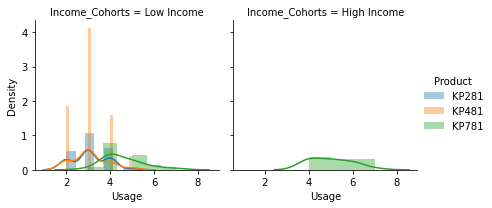

In [32]:
plt.figure(figsize=(10,8))
g = sns.FacetGrid(df, col="Income_Cohorts", hue='Product')
g.map(sns.distplot, "Usage")
g.add_legend()
plt.show()

In [103]:

cat_analysis(agg_var='Product', cat='Income_Cohorts')

# P(Income_Cohorts = Low Income) = 0.894
# Low Income Folks buy the most among the income cohorts.

# P(KP281 | Income_Cohorts = Low Income) = 0.497
# P(KP481 | Income_Cohorts = Low Income) = 0.373
# Low income folks prefer to buy KP281 or KP481. 

# P(KP781 | Income_Cohorts = High Income) = 1.0
# High income folks only buy KP781 because they can afford it.


Crosstab for Product w.r.t Income_Cohorts =
---------------------------------------
Income_Cohorts  Low Income  High Income
Product                                
KP281                   80            0
KP481                   60            0
KP781                   21           19
---------------------------------------
Marginal Probab across Product=
P(Product = KP281) = 0.444
P(Product = KP481) = 0.333
P(Product = KP781) = 0.222


Percentage Distribution across Product w.r.t Income_Cohorts = 
Income_Cohorts Low Income High Income
Product                              
KP281              100.0%        0.0%
KP481              100.0%        0.0%
KP781               52.5%       47.5%


P(Low Income | Product = KP281) = 
1.0


P(Low Income | Product = KP481) = 
1.0


P(Low Income | Product = KP781) = 
0.525


P(High Income | Product = KP281) = 
0.0


P(High Income | Product = KP481) = 
0.0


P(High Income | Product = KP781) = 
0.475


Marginal Probab across Income_Cohorts=
P(Income_Cohor

In [33]:

cat_analysis(agg_var='Product', cat='Age_Cohorts')

# P(Cohorts_by_Age = Young) = 0.439
# P(Cohorts_by_Age = Elderly) = 0.333

# Young & Elderly people are the most buyers for our products.

# P(KP281 | Cohorts_by_Age = Young) = 0.43
# P(KP481 | Cohorts_by_Age = Young) = 0.354

# Young folks prefer KP281 or KP481 treadmills.

# P(KP281 | Cohorts_by_Age = Mature) = 0.512
# P(KP781 | Cohorts_by_Age = Mature) = 0.317

# Mature folks prefer KP281 or KP781 treadmills.

# P(KP281 | Cohorts_by_Age = Elderly) = 0.417
# P(KP481 | Cohorts_by_Age = Elderly) = 0.417

# Elderly folks prefer KP281 or KP481 equally treadmills.

Crosstab for Product w.r.t Cohorts_by_Age =
---------------------------------------
Cohorts_by_Age  Young  Mature  Elderly
Product                               
KP281              34      21       25
KP481              28       7       25
KP781              17      13       10
---------------------------------------
Marginal Probab across Product=
P(Product = KP281) = 0.444
P(Product = KP481) = 0.333
P(Product = KP781) = 0.222


Percentage Distribution across Product w.r.t Cohorts_by_Age = 
Cohorts_by_Age   Young  Mature Elderly
Product                               
KP281            42.5%  26.25%  31.25%
KP481           46.67%  11.67%  41.67%
KP781            42.5%   32.5%   25.0%


P(Young | Product = KP281) = 
0.425


P(Young | Product = KP481) = 
0.467


P(Young | Product = KP781) = 
0.425


P(Mature | Product = KP281) = 
0.262


P(Mature | Product = KP481) = 
0.117


P(Mature | Product = KP781) = 
0.325


P(Elderly | Product = KP281) = 
0.312


P(Elderly | Product = KP481) = 
0.4

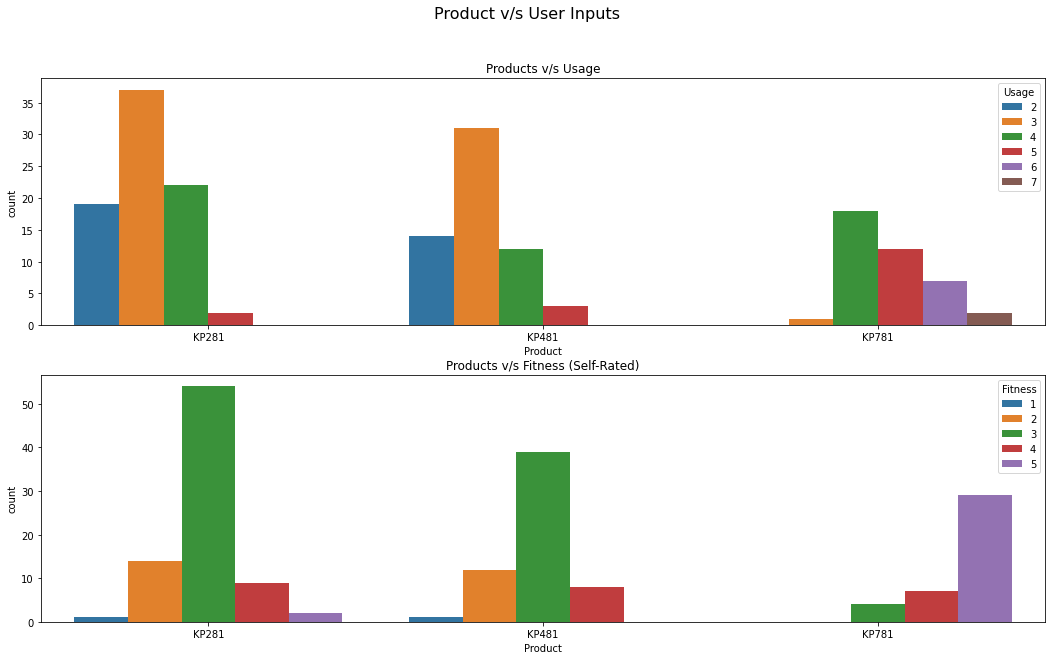

In [112]:
# Marital Status v/s Products Purchased
plt.figure(figsize=(18, 10))

plt.subplot(2, 1, 1)
sns.countplot(x=df['Product'], hue = df['Usage'])
plt.title("Products v/s Usage", fontsize=12)

plt.subplot(2, 1, 2)
sns.countplot(x=df['Product'], hue = df['Fitness'])
plt.title("Products v/s Fitness (Self-Rated)", fontsize=12)
# plt.show()
 
# plt.subplot(3, 1, 3)
# sns.countplot(x=df['Product'], hue = df['Miles'])
# plt.title("Products v/s Miles (Target Set)", fontsize=12)
# plt.show()
 

plt.suptitle("Product v/s User Inputs", fontsize=16)
plt.show()


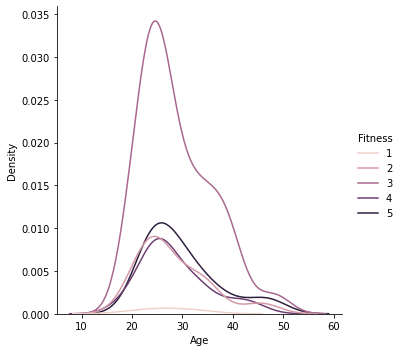

In [115]:
data = df.loc[:, :]

sns.displot(x=data['Age'], hue = data['Fitness'], kind='kde')
plt.show()

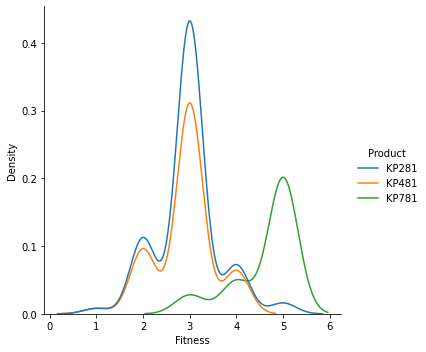

In [116]:
data = df.loc[:, :]

sns.displot(x=data['Fitness'], hue = data['Product'], kind='kde')
plt.show()

In [36]:

cat_analysis(agg_var='Product', cat='Fitness')



# KP481 & KP281 is significantly not preferred among fittest (5) and unfit people (1). 


# P(Fitness = 3) = 0.539
# People who rate themselves fitness 3 are the most common buyers of treadmills probably because most individuals aren't aware about themselves.


# P(KP281 | Fitness = 1) = 0.5
# P(KP481 | Fitness = 1) = 0.5
# From the above probabs, we can say that KP281 and KP481 are almost equally preferred among unfit individuals but the overall sample size and demand for treadmills among is extremely low.


# P(KP281 | Fitness = 2) = 0.538
# P(KP481 | Fitness = 2) = 0.461

# KP281 is preferred among slightly unfit people followed by moderate preference for KP481

# P(KP281 | Fitness = 3) = 0.557
# P(KP481 | Fitness = 3) = 0.402

# KP281 is preferred among moderately fit people followed by moderate preference for KP481

# P(KP481 | Fitness = 4) = 0.333
# P(KP281 | Fitness = 4) = 0.375

# KP481 or KP281 have a equally likely preference among fit people. Hence, even though KP481 has a good TAM (Total Addressable Market) but there seems to be a mismatch interms of product market fit.

# P(KP781 | Fitness = 5) = 0.936
# KP781 is significantly preferred among people who believe they are the fittest individuals (rating 5). Hence, they might feel the need to buy the most advanced equipments.





Crosstab for Product w.r.t Fitness =
---------------------------------------
Fitness  1   2   3  4   5
Product                  
KP281    1  14  54  9   2
KP481    1  12  39  8   0
KP781    0   0   4  7  29
---------------------------------------
Marginal Probab across Product=
P(Product = KP281) = 0.444
P(Product = KP481) = 0.333
P(Product = KP781) = 0.222


Percentage Distribution across Product w.r.t Fitness = 
Fitness      1      2      3       4      5
Product                                    
KP281    1.25%  17.5%  67.5%  11.25%   2.5%
KP481    1.67%  20.0%  65.0%  13.33%   0.0%
KP781     0.0%   0.0%  10.0%   17.5%  72.5%


P(1 | Product = KP281) = 
0.012


P(1 | Product = KP481) = 
0.017


P(1 | Product = KP781) = 
0.0


P(2 | Product = KP281) = 
0.175


P(2 | Product = KP481) = 
0.2


P(2 | Product = KP781) = 
0.0


P(3 | Product = KP281) = 
0.675


P(3 | Product = KP481) = 
0.65


P(3 | Product = KP781) = 
0.1


P(4 | Product = KP281) = 
0.112


P(4 | Product = KP481) = 
0.1

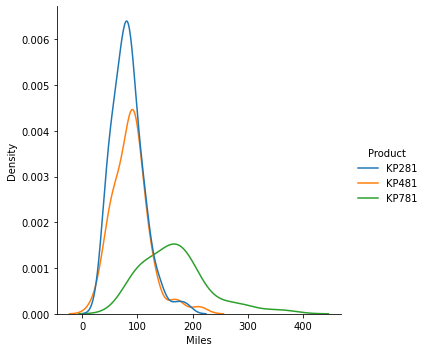

In [104]:
data = df.loc[:, :]

sns.displot(x=data['Miles'], hue=df['Product'], kind='kde')
plt.show()

# KP281, KP481 are similar kind of Products in terms of target based on miles set.
# KP781 has a higher Usage w.r.t KP281, KP481 in terms of target based on miles set.

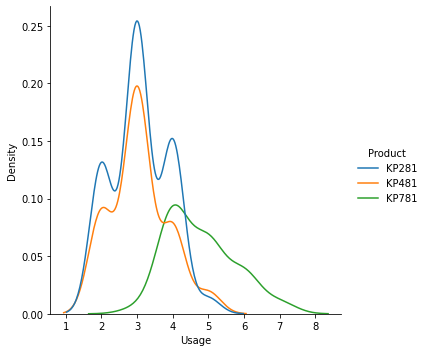

In [108]:
data = df.loc[:, :]

sns.displot(x=data['Usage'], hue=df['Product'], kind='kde')
plt.show()

In [106]:
cat_analysis(agg_var='Product', cat='Usage')

# P(Usage = 3) = 0.383
# P(Usage = 4) = 0.289
# A treadmill is expected to be used for 3-4 times a week.

# P(3 | Product = KP281) = 0.462
# If KP281 treadmill is bought, its mostly expected to be used for three times a week

# P(3 | Product = KP481) = 0.517
# If KP481 treadmill is bought, its mostly expected to be used for three times a week

# P(4 | Product = KP781) = 0.45
# P(5 | Product = KP781) = 0.3
# If KP781 treadmill is bought, its mostly expected to be used for 4-5 times a week.


Crosstab for Product w.r.t Usage =
---------------------------------------
Usage     2   3   4   5  6  7
Product                      
KP281    19  37  22   2  0  0
KP481    14  31  12   3  0  0
KP781     0   1  18  12  7  2
---------------------------------------
Marginal Probab across Product=
P(Product = KP281) = 0.444
P(Product = KP481) = 0.333
P(Product = KP781) = 0.222


Percentage Distribution across Product w.r.t Usage = 
Usage         2       3      4      5      6     7
Product                                           
KP281    23.75%  46.25%  27.5%   2.5%   0.0%  0.0%
KP481    23.33%  51.67%  20.0%   5.0%   0.0%  0.0%
KP781      0.0%    2.5%  45.0%  30.0%  17.5%  5.0%


P(2 | Product = KP281) = 
0.238


P(2 | Product = KP481) = 
0.233


P(2 | Product = KP781) = 
0.0


P(3 | Product = KP281) = 
0.462


P(3 | Product = KP481) = 
0.517


P(3 | Product = KP781) = 
0.025


P(4 | Product = KP281) = 
0.275


P(4 | Product = KP481) = 
0.2


P(4 | Product = KP781) = 
0.45


P(5 | Pr

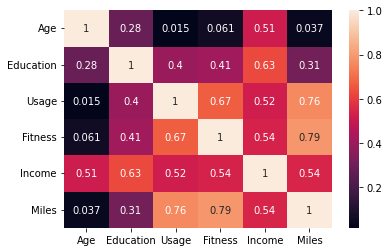

In [39]:
sns.heatmap(df.corr(), annot=True)
plt.show()

# Folks who think have better fitness tend to set higher miless targets and the ones setting higher miles targets tend to use the treadmills more per week

# Education doesn't impact fitness or usage or miles set but higher education might imply better income


In [40]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'Cohorts_by_Age', 'Income_Cohorts'],
      dtype='object')

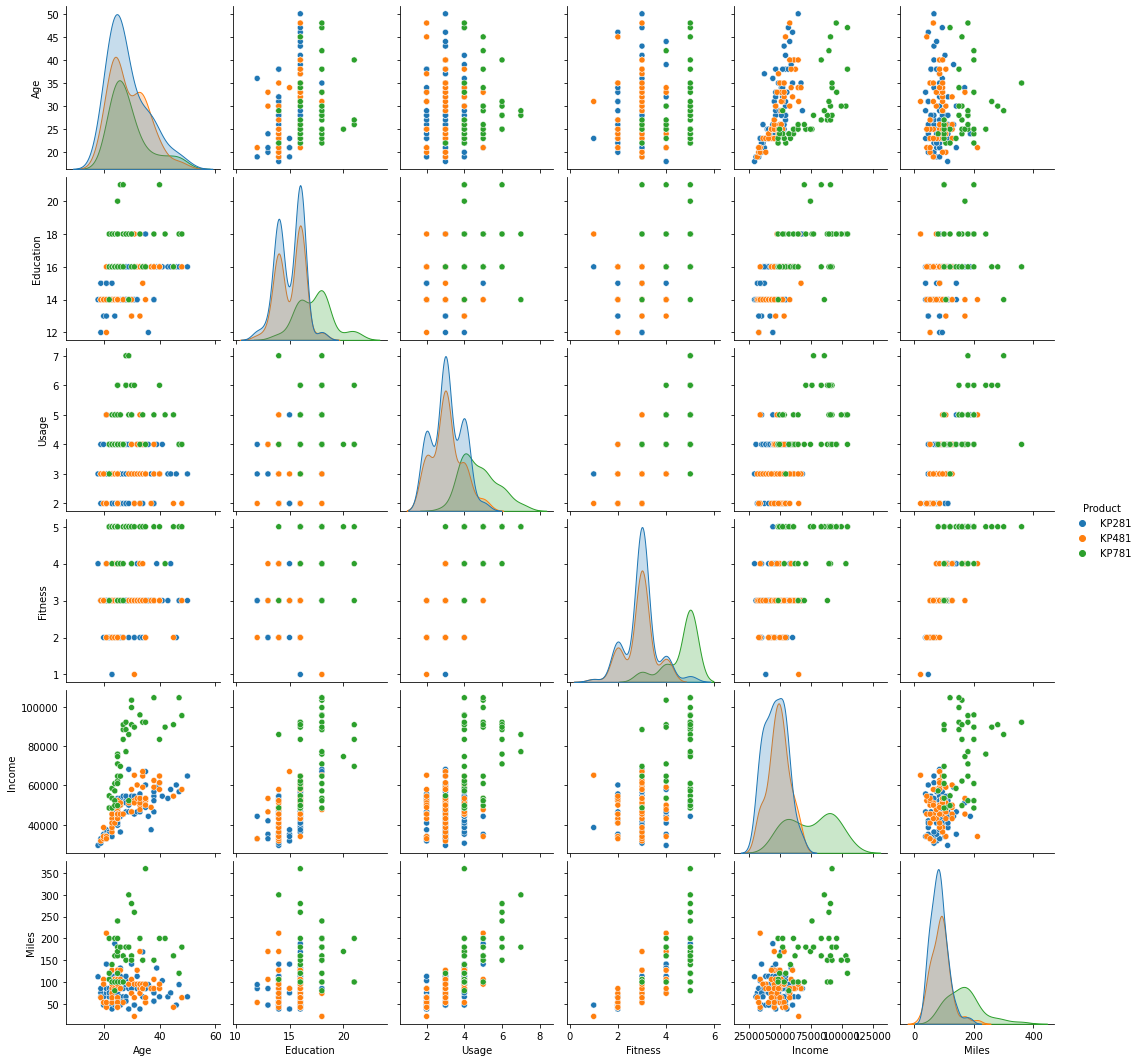

In [41]:
sns.pairplot(df, hue='Product')
# plt.show()

## Business Insights

#### Product

- KP281 is the most preferred product among customers

### Customer Profilling 

#### Marital Status

- Partnered people are significantly buying the three products more than single people 
- Both Partnered and Singles prefer KP281 or KP481 over KP781


#### Education cohorts

- Moderately educated customers are the most evident buyers of treadmills
- It implies KP781 is highly preferred among Highly Educated individuals probably because they earn well and can buy more advanced equipment.
- It implies KP281, KP481 is preferred among Less & moderately Educated individuals who don't require very expensive equipment.


#### Gender

- Males are the most evident buyers of Treadmills.
- It implies Females prefer KP281 or KP481
- It implies Females prefer KP281 is the most preferred product among males, although all the 3 products are almost equally probable in terms of sale.
- KP781 is significantly preferred among the males as compared to Females whereas other products have somewhat equal preference across genders.

#### Income cohorts

- Low Income Folks buy the most among the income cohorts.
- Low income folks prefer to buy KP281 or KP481. 
- High income folks only buy KP781 because they can afford it.

#### Age cohorts

- Young & Elderly people are the most buyers for our products.
- Young folks prefer KP281 or KP481 treadmills.
- Mature folks prefer KP281 or KP781 treadmills.
- Elderly folks prefer KP281 or KP481 equally treadmills.

### Customer Inputs

#### Fitness

- KP481 & KP281 is significantly not preferred among fittest (5) and unfit people (1). 
- People who rate themselves fitness 3 are the most common buyers of treadmills probably because most individuals aren't aware about themselves.
- We can say that KP281 and KP481 are almost equally preferred among unfit individuals but the overall sample size and demand for treadmills among is extremely low.
- KP281 is preferred among slightly unfit people followed by moderate preference for KP481
- KP281 is preferred among moderately fit people followed by moderate preference for KP481
- KP481 or KP281 have a equally likely preference among fit people. Hence, even though KP481 has a good TAM (Total Addressable Market) but there seems to be a mismatch interms of product market fit.
- KP781 is significantly preferred among people who believe they are the fittest individuals (rating 5). Hence, they might feel the need to buy the most advanced equipments.


#### Miles


- KP281, KP481 are similar kind of Products in terms of target based on miles set.
- KP781 has a higher Usage w.r.t KP281, KP481 in terms of target based on miles set.


#### Usage

- A treadmill is expected to be used for 3-4 times a week.
- If KP281 treadmill is bought, its mostly expected to be used for three times a week
- If KP481 treadmill is bought, its mostly expected to be used for three times a week
- If KP781 treadmill is bought, its mostly expected to be used for 4-5 times a week.


#### General Insights

- Folks who think have better fitness tend to set higher mile targets and the ones setting higher miles targets tend to use the treadmills more per week
- Education doesn't impact fitness or usage or miles set but higher education might imply better income


## Recommendations

- In terms of Demographics, one should target Males who are partnered within the age cohorts of Young, Elderly people. KP481 should be sold to them. Since, it is an intermediate product in terms of price and functionality. 

- People should be encouraged to set higher Miles targets as higher the miles target, higher is the usage.

- KP481 is an intermediate product between KP281 and KP781 but the product doesnt translate in terms of preference across any combination of demographics. Hence, either the price point needs to be brought down or better functionality needs to be introduced for a better product market fit.

- A richer class or highly educated or generally fairly fit individuals should be pushed for KP781 treadmills sale.